In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
d_patients = pd.read_csv('d_patients.csv')


In [91]:
d_patients.head()

,subject_id,sex,dob,dod,hospital_expire_flg
0,3,M,28/2/2606 00:00:00,2/5/2683 00:00:00,N
1,12,M,14/5/2803 00:00:00,9/10/2875 00:00:00,Y
2,21,M,22/5/3051 00:00:00,28/3/3139 00:00:00,Y
3,26,M,2/3/3007 00:00:00,22/12/3080 00:00:00,N
4,31,M,17/5/2606 00:00:00,29/8/2678 00:00:00,Y


In [92]:
d_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subject_id           4000 non-null   int64 
 1   sex                  3987 non-null   object
 2   dob                  4000 non-null   object
 3   dod                  4000 non-null   object
 4   hospital_expire_flg  4000 non-null   object
dtypes: int64(1), object(4)
memory usage: 156.4+ KB


In [4]:
df=pd.read_csv('comorbidity_scores.csv')

In [5]:
new_df = pd.merge(d_patients,df,how='inner',on='subject_id')

In [93]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5049 entries, 0 to 5048
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_id                5049 non-null   int64 
 1   sex                       5036 non-null   object
 2   dob                       5049 non-null   object
 3   dod                       5049 non-null   object
 4   hospital_expire_flg       5049 non-null   object
 5   hadm_id                   5049 non-null   int64 
 6   category                  5049 non-null   object
 7   congestive_heart_failure  5049 non-null   int64 
 8   cardiac_arrhythmias       5049 non-null   int64 
 9   valvular_disease          5049 non-null   int64 
 10  pulmonary_circulation     5049 non-null   int64 
 11  peripheral_vascular       5049 non-null   int64 
 12  hypertension              5049 non-null   int64 
 13  paralysis                 5049 non-null   int64 
 14  other_neurological      

In [6]:
pd.read_table

<function pandas.io.parsers.read_table(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep='\t', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)>

In [7]:
new_df.pivot_table(values='hypertension',columns='hospital_expire_flg',index='sex') 

hospital_expire_flg,N,Y
sex,,
F,0.329694,0.308884
M,0.276887,0.214639


Days with highest mortality

In [8]:
new_df['dod'].value_counts().head(5)

29/11/3418 00:00:00    33
24/7/2635 00:00:00     24
24/8/2538 00:00:00     12
5/4/3333 00:00:00       9
21/4/2675 00:00:00      9
Name: dod, dtype: int64

With more exploration we see these values are not real values
the day with highest number of deaths has many duplicates of the same patient subject id

In [9]:
new_df[new_df['dod']=='29/11/3418 00:00:00']['subject_id']


2278    13033
2279    13033
2280    13033
2281    13033
2282    13033
2283    13033
2284    13033
2285    13033
2286    13033
2287    13033
2288    13033
2289    13033
2290    13033
2291    13033
2292    13033
2293    13033
2294    13033
2295    13033
2296    13033
2297    13033
2298    13033
2299    13033
2300    13033
2301    13033
2302    13033
2303    13033
2304    13033
2305    13033
2306    13033
2307    13033
2308    13033
2309    13033
2310    13033
Name: subject_id, dtype: int64

Here we confirm that patient with subject id 13033 is duplicated 33 times!
and many other paitents as well

In [10]:
new_df['subject_id'].value_counts()


13033    33
19213    24
15472    12
16994     9
21431     9
         ..
13260     1
27595     1
17354     1
23497     1
8192      1
Name: subject_id, Length: 3943, dtype: int64

With more exploration we found this is not duplication
indeed, this patient has been admitted many differet times with different hospital admission id each time!

In [11]:
new_df[new_df['subject_id']==13033]['hadm_id'] 


2278     1507
2279     1696
2280     3537
2281     3599
2282     3691
2283     4775
2284     5146
2285     5179
2286     7835
2287     8047
2288     9215
2289     9280
2290    10477
2291    10931
2292    10943
2293    12208
2294    12715
2295    13866
2296    16077
2297    16663
2298    17071
2299    18005
2300    18322
2301    18892
2302    19943
2303    23236
2304    25331
2305    26187
2306    26649
2307    26709
2308    27836
2309    28691
2310    29005
Name: hadm_id, dtype: int64

Even comorbidites were different each time.
For example, 8 times he had fluid and electrolyte imbalace and 25 times he had not!

In [12]:
new_df[(new_df['subject_id']==13033) & (new_df['fluid_electrolyte']==0)].count()
# new_df[(new_df['subject_id']==13033) & (new_df['fluid_electrolyte']==1)].count()


subject_id                  25
sex                         25
dob                         25
dod                         25
hospital_expire_flg         25
hadm_id                     25
category                    25
congestive_heart_failure    25
cardiac_arrhythmias         25
valvular_disease            25
pulmonary_circulation       25
peripheral_vascular         25
hypertension                25
paralysis                   25
other_neurological          25
chronic_pulmonary           25
diabetes_uncomplicated      25
diabetes_complicated        25
hypothyroidism              25
renal_failure               25
liver_disease               25
peptic_ulcer                25
aids                        25
lymphoma                    25
metastatic_cancer           25
solid_tumor                 25
rheumatoid_arthritis        25
coagulopathy                25
obesity                     25
weight_loss                 25
fluid_electrolyte           25
blood_loss_anemia           25
deficien

In [13]:
new_df[new_df['hospital_expire_flg']=='N'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3067 entries, 0 to 4801
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_id                3067 non-null   int64 
 1   sex                       3057 non-null   object
 2   dob                       3067 non-null   object
 3   dod                       3067 non-null   object
 4   hospital_expire_flg       3067 non-null   object
 5   hadm_id                   3067 non-null   int64 
 6   category                  3067 non-null   object
 7   congestive_heart_failure  3067 non-null   int64 
 8   cardiac_arrhythmias       3067 non-null   int64 
 9   valvular_disease          3067 non-null   int64 
 10  pulmonary_circulation     3067 non-null   int64 
 11  peripheral_vascular       3067 non-null   int64 
 12  hypertension              3067 non-null   int64 
 13  paralysis                 3067 non-null   int64 
 14  other_neurological      

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5049 entries, 0 to 5048
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   subject_id                5049 non-null   int64 
 1   sex                       5036 non-null   object
 2   dob                       5049 non-null   object
 3   dod                       5049 non-null   object
 4   hospital_expire_flg       5049 non-null   object
 5   hadm_id                   5049 non-null   int64 
 6   category                  5049 non-null   object
 7   congestive_heart_failure  5049 non-null   int64 
 8   cardiac_arrhythmias       5049 non-null   int64 
 9   valvular_disease          5049 non-null   int64 
 10  pulmonary_circulation     5049 non-null   int64 
 11  peripheral_vascular       5049 non-null   int64 
 12  hypertension              5049 non-null   int64 
 13  paralysis                 5049 non-null   int64 
 14  other_neurological      

In [15]:
d_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subject_id           4000 non-null   int64 
 1   sex                  3987 non-null   object
 2   dob                  4000 non-null   object
 3   dod                  4000 non-null   object
 4   hospital_expire_flg  4000 non-null   object
dtypes: int64(1), object(4)
memory usage: 156.4+ KB


In [16]:

d_patients.groupby('hospital_expire_flg').count().transpose()

hospital_expire_flg,N,Y
subject_id,2347,1653
sex,2337,1650
dob,2347,1653
dod,2347,1653


In [17]:
d_patients.dropna().groupby('hospital_expire_flg').count()

,subject_id,sex,dob,dod
hospital_expire_flg,,,,
N,2337,2337,2337,2337
Y,1650,1650,1650,1650


In [95]:
d_patients.drop_duplicates().dropna().groupby('hospital_expire_flg').count()

,subject_id,sex,dob,dod
hospital_expire_flg,,,,
N,2337,2337,2337,2337
Y,1650,1650,1650,1650


In [18]:
d_patients

,subject_id,sex,dob,dod,hospital_expire_flg
0,3,M,28/2/2606 00:00:00,2/5/2683 00:00:00,N
1,12,M,14/5/2803 00:00:00,9/10/2875 00:00:00,Y
2,21,M,22/5/3051 00:00:00,28/3/3139 00:00:00,Y
3,26,M,2/3/3007 00:00:00,22/12/3080 00:00:00,N
4,31,M,17/5/2606 00:00:00,29/8/2678 00:00:00,Y
...,...,...,...,...,...
3995,32686,M,6/12/2543 00:00:00,27/6/2612 00:00:00,Y
3996,32705,F,5/3/3257 00:00:00,7/4/3337 00:00:00,Y
3997,32706,M,14/2/2595 00:00:00,21/3/2676 00:00:00,Y
3998,32711,F,21/12/3057 00:00:00,22/5/3143 00:00:00,Y


In [19]:
d_patients[['dob','dod']].dtypes

dob    object
dod    object
dtype: object

In [20]:
d_patients['hospital_expire_flg']

0       N
1       Y
2       Y
3       N
4       Y
       ..
3995    Y
3996    Y
3997    Y
3998    Y
3999    Y
Name: hospital_expire_flg, Length: 4000, dtype: object

In [21]:
df[df['subject_id']==56]


,subject_id,hadm_id,category,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,...,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
0,56,28766,ELIXHAUSER,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [22]:
d_patients[d_patients['subject_id']==56]

,subject_id,sex,dob,dod,hospital_expire_flg
6,56,F,26/5/2553 00:00:00,23/1/2644 00:00:00,Y


In [23]:
df

,subject_id,hadm_id,category,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,...,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
0,56,28766,ELIXHAUSER,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,37,18052,ELIXHAUSER,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,78,15161,ELIXHAUSER,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,67,35878,ELIXHAUSER,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,3,2075,ELIXHAUSER,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,32667,36071,ELIXHAUSER,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
5045,32627,33957,ELIXHAUSER,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5046,32675,35514,ELIXHAUSER,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5047,32686,30102,ELIXHAUSER,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
df.set_index('subject_id')

,hadm_id,category,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,other_neurological,...,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression
subject_id,,,,,,,,,,,,,,,,,,,,,
56,28766,ELIXHAUSER,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
37,18052,ELIXHAUSER,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,15161,ELIXHAUSER,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
67,35878,ELIXHAUSER,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2075,ELIXHAUSER,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32667,36071,ELIXHAUSER,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
32627,33957,ELIXHAUSER,1,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
32675,35514,ELIXHAUSER,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
df[(df['diabetes_uncomplicated']==1) | (df['diabetes_complicated']==1)][['subject_id','category']]

,subject_id,category
1,37,ELIXHAUSER
10,21,ELIXHAUSER
11,21,ELIXHAUSER
12,83,ELIXHAUSER
25,117,ELIXHAUSER
...,...,...
5033,32594,ELIXHAUSER
5038,32529,ELIXHAUSER
5039,32706,ELIXHAUSER
5045,32627,ELIXHAUSER


**GroupBy male and female and id

In [27]:
g_sex= d_patients.groupby('sex')

In [28]:
g_sex

In [29]:
g_sex.mean()

,subject_id
sex,
F,14625.440194
M,14221.263257


LETS MOVE TO VISUALIZATION

In [30]:
new_df.columns

Index(['subject_id', 'sex', 'dob', 'dod', 'hospital_expire_flg', 'hadm_id',
       'category', 'congestive_heart_failure', 'cardiac_arrhythmias',
       'valvular_disease', 'pulmonary_circulation', 'peripheral_vascular',
       'hypertension', 'paralysis', 'other_neurological', 'chronic_pulmonary',
       'diabetes_uncomplicated', 'diabetes_complicated', 'hypothyroidism',
       'renal_failure', 'liver_disease', 'peptic_ulcer', 'aids', 'lymphoma',
       'metastatic_cancer', 'solid_tumor', 'rheumatoid_arthritis',
       'coagulopathy', 'obesity', 'weight_loss', 'fluid_electrolyte',
       'blood_loss_anemia', 'deficiency_anemias', 'alcohol_abuse',
       'drug_abuse', 'psychoses', 'depression'],
      dtype='object')

Using beutifull Plotly and Cufflinks

In [8]:
import chart_studio.plotly as py
import cufflinks as cf



In [9]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [10]:
init_notebook_mode(connected=True)


In [12]:
cf.go_offline()

In [21]:
new_df['survived'].iplot(kind='histogram',mode='markers',size=10)


In [32]:
x0= new_df[new_df['congestive_heart_failure']==0]['subject_id']
# x0= new_df[new_df['congestive_heart_failure']==0]['congestive_heart_failure']
x1= new_df[new_df['congestive_heart_failure']==1]['subject_id']
# x1= new_df[new_df['congestive_heart_failure']==1]['congestive_heart_failure']

# y0= new_df['hospital_expire_flg']
y0= new_df[new_df['congestive_heart_failure']==0]['hospital_expire_flg']
# y0= new_df[new_df['congestive_heart_failure']==0]['hospital_expire_flg']
y1= new_df[new_df['congestive_heart_failure']==1]['hospital_expire_flg']


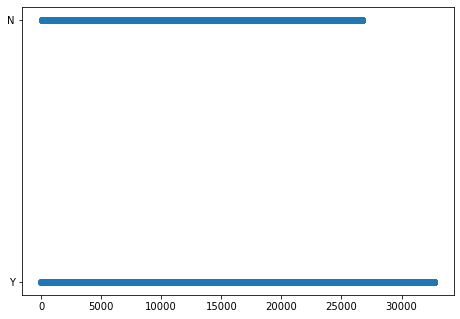

In [33]:
fig = plt.figure()
ax0 = fig.add_axes([0,0,1,1])
# ax1 = fig.add_axes([0,0,1,1])

ax0.scatter(x=x0,y=y0)
# ax0.plot(x0,y0,'r')
# ax1.plot(x1,y1,'r')

In [34]:
import seaborn as sns  

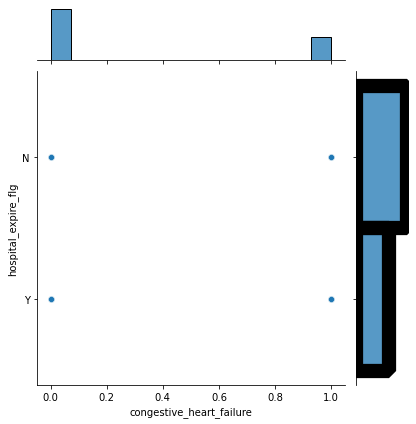

In [35]:
sns.jointplot(x='congestive_heart_failure', y='hospital_expire_flg',data=new_df, kind='scatter')

<AxesSubplot:xlabel='congestive_heart_failure', ylabel='count'>

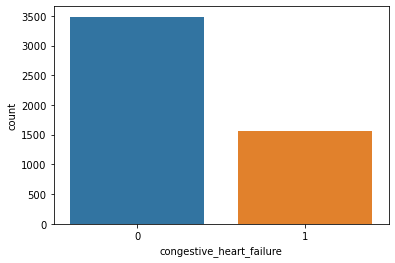

In [36]:
sns.countplot(x='congestive_heart_failure',data=new_df)

In [37]:
new_df['aids'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: aids, dtype: int64

<AxesSubplot:xlabel='hospital_expire_flg', ylabel='count'>

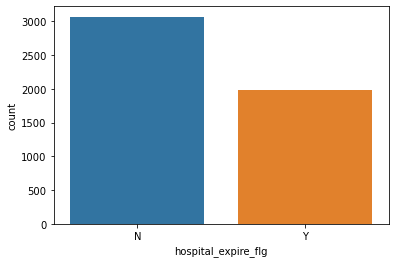

In [38]:
sns.countplot(x='hospital_expire_flg',data=new_df)

<AxesSubplot:xlabel='hospital_expire_flg', ylabel='count'>

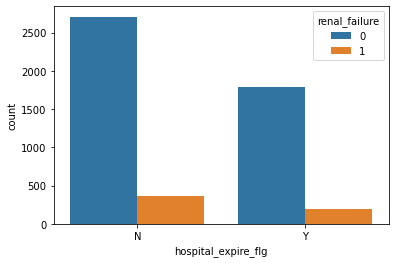

In [39]:
sns.countplot(x='hospital_expire_flg',data=new_df,hue='renal_failure')

<AxesSubplot:xlabel='renal_failure', ylabel='count'>

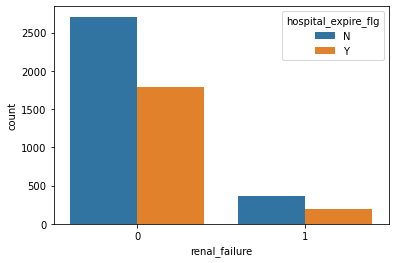

In [40]:
sns.countplot(x='renal_failure',data=new_df,hue='hospital_expire_flg')


<AxesSubplot:xlabel='renal_failure', ylabel='hospital_expire_flg'>

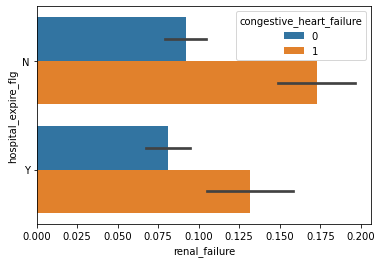

In [41]:
sns.barplot(x='renal_failure',y='hospital_expire_flg',data=new_df,hue='congestive_heart_failure')


In [42]:
new_df.columns

Index(['subject_id', 'sex', 'dob', 'dod', 'hospital_expire_flg', 'hadm_id',
       'category', 'congestive_heart_failure', 'cardiac_arrhythmias',
       'valvular_disease', 'pulmonary_circulation', 'peripheral_vascular',
       'hypertension', 'paralysis', 'other_neurological', 'chronic_pulmonary',
       'diabetes_uncomplicated', 'diabetes_complicated', 'hypothyroidism',
       'renal_failure', 'liver_disease', 'peptic_ulcer', 'aids', 'lymphoma',
       'metastatic_cancer', 'solid_tumor', 'rheumatoid_arthritis',
       'coagulopathy', 'obesity', 'weight_loss', 'fluid_electrolyte',
       'blood_loss_anemia', 'deficiency_anemias', 'alcohol_abuse',
       'drug_abuse', 'psychoses', 'depression'],
      dtype='object')

In [18]:
new_df['survived']=[1 if x=='N' else 0 for x in new_df['hospital_expire_flg']]

In [44]:
new_df[['survived','hospital_expire_flg']]

,survived,hospital_expire_flg
0,1,N
1,0,Y
2,0,Y
3,0,Y
4,1,N
...,...,...
5044,0,Y
5045,0,Y
5046,0,Y
5047,0,Y


<AxesSubplot:xlabel='solid_tumor', ylabel='survived'>

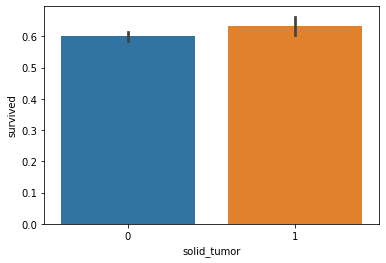

In [45]:
sns.barplot(x='solid_tumor',y='survived',data=new_df)


<AxesSubplot:xlabel='metastatic_cancer', ylabel='count'>

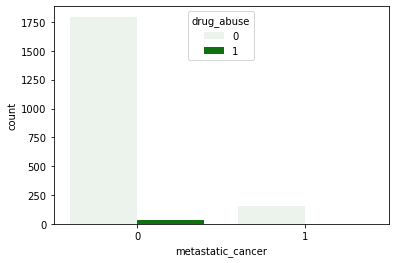

In [46]:
sns.countplot(x='metastatic_cancer',data=new_df.query('survived == 0'),color='green',hue='drug_abuse')


<AxesSubplot:xlabel='survived', ylabel='count'>

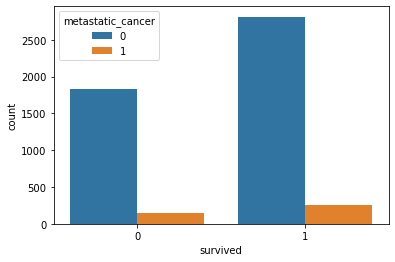

In [47]:
sns.countplot(x='survived',data=new_df,hue='metastatic_cancer')


<AxesSubplot:xlabel='survived', ylabel='count'>

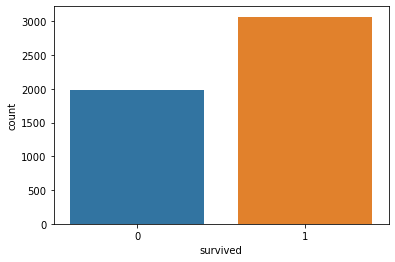

In [48]:
sns.countplot(x='survived',data=new_df)


In [49]:
new_df['score']=np.sum(new_df[['congestive_heart_failure', 'cardiac_arrhythmias',
       'valvular_disease', 'pulmonary_circulation', 'peripheral_vascular',
       'hypertension', 'paralysis', 'other_neurological', 'chronic_pulmonary',
       'diabetes_uncomplicated', 'diabetes_complicated', 'hypothyroidism',
       'renal_failure', 'liver_disease', 'peptic_ulcer', 'aids', 'lymphoma',
       'metastatic_cancer', 'solid_tumor', 'rheumatoid_arthritis',
       'coagulopathy', 'obesity', 'weight_loss', 'fluid_electrolyte',
       'blood_loss_anemia', 'deficiency_anemias', 'alcohol_abuse',
       'drug_abuse', 'psychoses', 'depression']],axis=1)

In [50]:
new_df['score']

0       2
1       2
2       3
3       7
4       2
       ..
5044    2
5045    0
5046    3
5047    5
5048    5
Name: score, Length: 5049, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='score'>

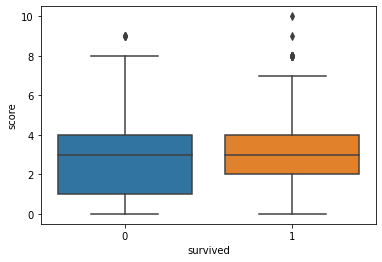

In [51]:
sns.boxplot(x='survived',y='score',data=new_df)

In [52]:
plt.style.use('ggplot')

<AxesSubplot:ylabel='Frequency'>

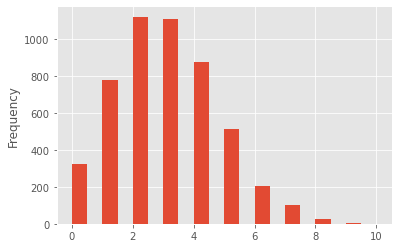

In [53]:
new_df['score'].plot.hist(bins=20)

<AxesSubplot:>

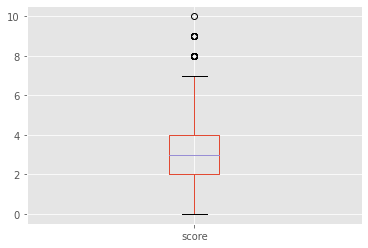

In [54]:
new_df['score'].plot.box()


<AxesSubplot:xlabel='score', ylabel='subject_id'>

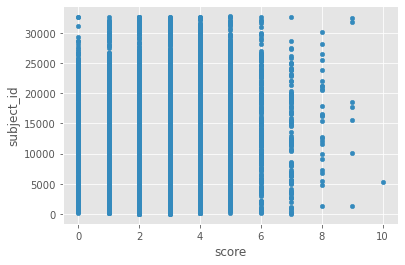

In [55]:
new_df.plot.scatter(x='score',y='subject_id')


<AxesSubplot:ylabel='Density'>

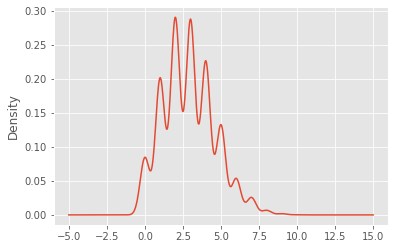

In [56]:
new_df['score'].plot.density()


In [57]:
new_df['score'].max()

10

humm it looks like this data needs some cleaning to correct these unlogic results!

we have some issues:
1. duplictes (patients who has beed admitted more than one time)

how to deal?
- create new attribute called 'number_of_admissions' that will show number of duplicats for each repeatedly admitted patient
- calculate average length of stay for this patient and update his LOS attribute
- so LOS will calculate date difference of times of admissions is 1 and will calculate avg of date difference of each admission time if admitted more than 1 time 
- delete all duplicates


In the following steps I calculated LOS but after failed trial.

first I tried to convert the object data in admit_dt to datetime object so that I can make calculation later but this failed because dates here are not actual so all of them are out of Pandas to_datetime function range which is limited.

Then I tried using python own datetime strptime fuction in a new function that calculates the datetime difference directly from the existing data without cleaning. This is the way that succeeded.


In [58]:
new_df['dod']

0         2/5/2683 00:00:00
1        9/10/2875 00:00:00
2        28/3/3139 00:00:00
3        28/3/3139 00:00:00
4       22/12/3080 00:00:00
               ...         
5044     27/6/2612 00:00:00
5045      7/4/3337 00:00:00
5046     21/3/2676 00:00:00
5047     22/5/3143 00:00:00
5048      9/7/2724 00:00:00
Name: dod, Length: 5049, dtype: object

In [23]:
adms = pd.read_csv('admissions.csv')

In [60]:
adms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5074 entries, 0 to 5073
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hadm_id     5074 non-null   int64 
 1   subject_id  5074 non-null   int64 
 2   admit_dt    5074 non-null   object
 3   disch_dt    5074 non-null   object
dtypes: int64(2), object(2)
memory usage: 158.7+ KB


In [61]:
adms['admit_dt']

0         8/7/3033 00:00:00
1        16/5/3388 00:00:00
2         3/4/3381 00:00:00
3        28/8/3015 00:00:00
4        11/9/3125 00:00:00
               ...         
5069    11/12/2541 00:00:00
5070     20/5/3143 00:00:00
5071     18/2/2866 00:00:00
5072     24/4/2724 00:00:00
5073     27/4/2675 00:00:00
Name: admit_dt, Length: 5074, dtype: object

In [62]:
adms['clean_admit_dt'] = [x.split()[0] for x in adms['admit_dt']]

In [63]:
adms['clean_admit_dt']

0         8/7/3033
1        16/5/3388
2         3/4/3381
3        28/8/3015
4        11/9/3125
           ...    
5069    11/12/2541
5070     20/5/3143
5071     18/2/2866
5072     24/4/2724
5073     27/4/2675
Name: clean_admit_dt, Length: 5074, dtype: object

In [64]:
test = adms['clean_admit_dt'][0]

In [30]:
from datetime import datetime 


In [66]:
result

datetime.datetime(3033, 7, 8, 0, 0)

In [27]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%d/%m/%Y %H:%M:%S")
    d2 = datetime.strptime(d2, "%d/%m/%Y %H:%M:%S")
    return abs((d2 - d1).days)

In [68]:
adms['LOS'] = adms.apply(lambda x: days_between(x['admit_dt'], x['disch_dt']), axis=1)


In [69]:
adms['LOS']

0        9
1        5
2       19
3        8
4       11
        ..
5069     9
5070     2
5071     9
5072     3
5073     1
Name: LOS, Length: 5074, dtype: int64

In [70]:
df_los = pd.merge(new_df,adms,how='inner',on='subject_id')

In [72]:
df_los.count()

subject_id                  10190
sex                         10177
dob                         10190
dod                         10190
hospital_expire_flg         10190
hadm_id_x                   10190
category                    10190
congestive_heart_failure    10190
cardiac_arrhythmias         10190
valvular_disease            10190
pulmonary_circulation       10190
peripheral_vascular         10190
hypertension                10190
paralysis                   10190
other_neurological          10190
chronic_pulmonary           10190
diabetes_uncomplicated      10190
diabetes_complicated        10190
hypothyroidism              10190
renal_failure               10190
liver_disease               10190
peptic_ulcer                10190
aids                        10190
lymphoma                    10190
metastatic_cancer           10190
solid_tumor                 10190
rheumatoid_arthritis        10190
coagulopathy                10190
obesity                     10190
weight_loss   

In [73]:
def years_between(d1, d2):
    d1 = datetime.strptime(d1, "%d/%m/%Y %H:%M:%S")
    d2 = datetime.strptime(d2, "%d/%m/%Y %H:%M:%S")
    return abs((d2 - d1).weeks)

In [74]:
df_los['age']=df_los.apply(lambda x: days_between(x['dob'], x['dod']), axis=1)

In [75]:
df_los['age'].count()

10190

<AxesSubplot:ylabel='Frequency'>

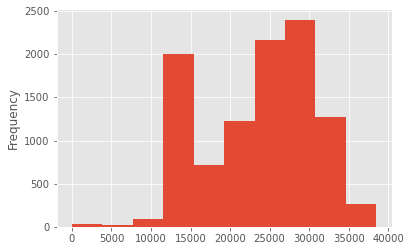

In [76]:
df_los['age'].plot.hist()

In [77]:
df_los.columns

Index(['subject_id', 'sex', 'dob', 'dod', 'hospital_expire_flg', 'hadm_id_x',
       'category', 'congestive_heart_failure', 'cardiac_arrhythmias',
       'valvular_disease', 'pulmonary_circulation', 'peripheral_vascular',
       'hypertension', 'paralysis', 'other_neurological', 'chronic_pulmonary',
       'diabetes_uncomplicated', 'diabetes_complicated', 'hypothyroidism',
       'renal_failure', 'liver_disease', 'peptic_ulcer', 'aids', 'lymphoma',
       'metastatic_cancer', 'solid_tumor', 'rheumatoid_arthritis',
       'coagulopathy', 'obesity', 'weight_loss', 'fluid_electrolyte',
       'blood_loss_anemia', 'deficiency_anemias', 'alcohol_abuse',
       'drug_abuse', 'psychoses', 'depression', 'survived', 'score',
       'hadm_id_y', 'admit_dt', 'disch_dt', 'clean_admit_dt', 'LOS', 'age'],
      dtype='object')

<AxesSubplot:xlabel='score', ylabel='age'>

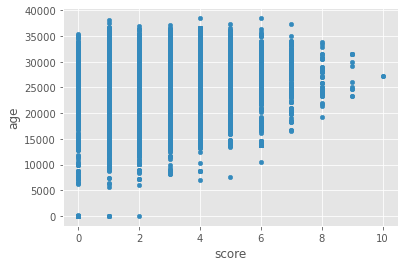

In [78]:
df_los.plot.scatter(x='score',y='age')

In [79]:
df_los[['age','score','LOS']].corr()

,age,score,LOS
age,1.000000,0.216205,-0.006452
score,0.216205,1.000000,0.048282
LOS,-0.006452,0.048282,1.000000


In [80]:
df_los['subject_id'].nunique()

3943

In [83]:
df_los['subject_id'].notnull().count()


10190

In [87]:
df_los['subject_id'][df_los['subject_id'].duplicated()==True]

3          21
4          21
5          21
11         61
12         61
        ...  
9933    26698
9934    26698
9942    26727
9943    26727
9944    26727
Name: subject_id, Length: 6247, dtype: int64

In [89]:
df_los[df_los['subject_id'].duplicated()==True].head(6)


,subject_id,sex,dob,dod,hospital_expire_flg,hadm_id_x,category,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,...,psychoses,depression,survived,score,hadm_id_y,admit_dt,disch_dt,clean_admit_dt,LOS,age
3,21,M,22/5/3051 00:00:00,28/3/3139 00:00:00,Y,20666,ELIXHAUSER,0,0,0,...,0,0,0,3,20882,19/3/3139 00:00:00,28/3/3139 00:00:00,19/3/3139,9,32086
4,21,M,22/5/3051 00:00:00,28/3/3139 00:00:00,Y,20882,ELIXHAUSER,0,1,0,...,0,0,0,7,20666,29/10/3138 00:00:00,11/11/3138 00:00:00,29/10/3138,13,32086
5,21,M,22/5/3051 00:00:00,28/3/3139 00:00:00,Y,20882,ELIXHAUSER,0,1,0,...,0,0,0,7,20882,19/3/3139 00:00:00,28/3/3139 00:00:00,19/3/3139,9,32086
11,61,M,27/10/3297 00:00:00,9/2/3353 00:00:00,Y,5712,ELIXHAUSER,0,1,0,...,0,0,0,2,7149,23/6/3352 00:00:00,26/7/3352 00:00:00,23/6/3352,33,20193
12,61,M,27/10/3297 00:00:00,9/2/3353 00:00:00,Y,7149,ELIXHAUSER,0,0,0,...,0,0,0,3,5712,10/1/3353 00:00:00,9/2/3353 00:00:00,10/1/3353,30,20193
13,61,M,27/10/3297 00:00:00,9/2/3353 00:00:00,Y,7149,ELIXHAUSER,0,0,0,...,0,0,0,3,7149,23/6/3352 00:00:00,26/7/3352 00:00:00,23/6/3352,33,20193


In [90]:
df_los[df_los['subject_id']==21]


,subject_id,sex,dob,dod,hospital_expire_flg,hadm_id_x,category,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,...,psychoses,depression,survived,score,hadm_id_y,admit_dt,disch_dt,clean_admit_dt,LOS,age
2,21,M,22/5/3051 00:00:00,28/3/3139 00:00:00,Y,20666,ELIXHAUSER,0,0,0,...,0,0,0,3,20666,29/10/3138 00:00:00,11/11/3138 00:00:00,29/10/3138,13,32086
3,21,M,22/5/3051 00:00:00,28/3/3139 00:00:00,Y,20666,ELIXHAUSER,0,0,0,...,0,0,0,3,20882,19/3/3139 00:00:00,28/3/3139 00:00:00,19/3/3139,9,32086
4,21,M,22/5/3051 00:00:00,28/3/3139 00:00:00,Y,20882,ELIXHAUSER,0,1,0,...,0,0,0,7,20666,29/10/3138 00:00:00,11/11/3138 00:00:00,29/10/3138,13,32086
5,21,M,22/5/3051 00:00:00,28/3/3139 00:00:00,Y,20882,ELIXHAUSER,0,1,0,...,0,0,0,7,20882,19/3/3139 00:00:00,28/3/3139 00:00:00,19/3/3139,9,32086


In [24]:
basic = pd.merge(adms,d_patients,on='subject_id')

In [25]:
basic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5074 entries, 0 to 5073
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   hadm_id              5074 non-null   int64 
 1   subject_id           5074 non-null   int64 
 2   admit_dt             5074 non-null   object
 3   disch_dt             5074 non-null   object
 4   sex                  5061 non-null   object
 5   dob                  5074 non-null   object
 6   dod                  5074 non-null   object
 7   hospital_expire_flg  5074 non-null   object
dtypes: int64(2), object(6)
memory usage: 356.8+ KB


In [119]:
basic['admit_age']=basic.apply(lambda x: (days_between(x['dob'],x['admit_dt']))/365.2425,axis=1)

In [131]:
basic.drop(basic[basic['admit_age']<15].index,axis=0,inplace=True)

In [132]:
basic[basic['admit_age']<15]

,hadm_id,subject_id,admit_dt,disch_dt,sex,dob,dod,hospital_expire_flg,admit_age


In [133]:
basic[basic['hospital_expire_flg']=='Y']['admit_age']


8       83.374744
11      49.315181
22      86.547978
28      62.391425
29      62.339405
          ...    
5069    83.998987
5070    85.409009
5071    88.083944
5072    91.708933
5073    57.214043
Name: admit_age, Length: 1967, dtype: float64

In [134]:
basic[basic['hospital_expire_flg']=='Y']['admit_age'].describe()


count    1967.000000
mean       70.270573
std        16.403284
min        15.170743
25%        60.032718
50%        73.493638
75%        82.881921
max       105.343710
Name: admit_age, dtype: float64

<AxesSubplot:>

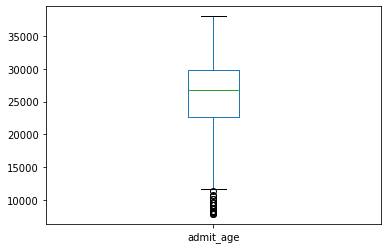

In [48]:
basic[basic['hospital_expire_flg']=='N']['admit_age'].plot(kind='box')


hospital_expire_flg
N    AxesSubplot(0.125,0.125;0.775x0.755)
Y    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

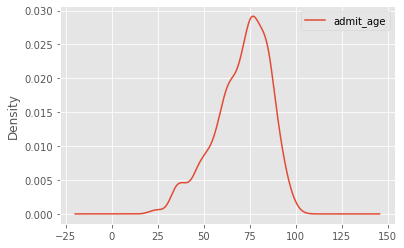

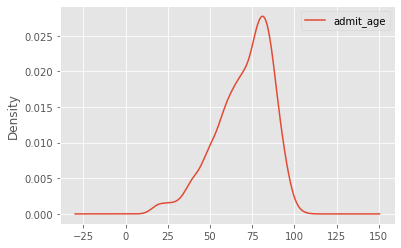

In [135]:
basic[['admit_age','hospital_expire_flg']].groupby('hospital_expire_flg').plot(kind='kde')

<AxesSubplot:>

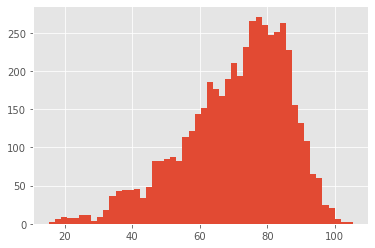

In [137]:
plt.style.use('ggplot')
basic['admit_age'].hist(bins=50)


In [58]:
import seaborn as sns

<AxesSubplot:xlabel='admit_age', ylabel='hospital_expire_flg'>

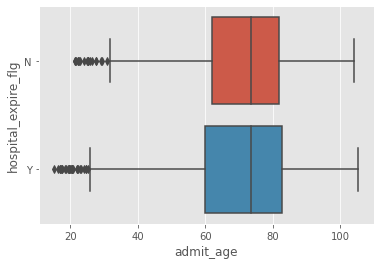

In [138]:
sns.boxplot(x="admit_age",y="hospital_expire_flg",data=basic)


Conclusion:
When comparing admit age without cleaning the data we found no significant difference between the died and the survived patients

# Comparing admit age with cleaning the data from duplicates

In [76]:
basic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5074 entries, 0 to 5073
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   hadm_id              5074 non-null   int64 
 1   subject_id           5074 non-null   int64 
 2   admit_dt             5074 non-null   object
 3   disch_dt             5074 non-null   object
 4   sex                  5061 non-null   object
 5   dob                  5074 non-null   object
 6   dod                  5074 non-null   object
 7   hospital_expire_flg  5074 non-null   object
 8   admit_age            5074 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 556.4+ KB


In [83]:
basic['hadm_id'].nunique()

5074

In [84]:
basic['subject_id'].nunique()

3952

In [139]:
basic['admit_age'].describe()


count    5045.000000
mean       70.611195
std        15.477512
min        15.170743
25%        61.326379
50%        73.477210
75%        82.386360
max       105.343710
Name: admit_age, dtype: float64

In [140]:
basic[basic['subject_id'].duplicated()==False]['admit_age'].describe()


count    3924.000000
mean       71.698908
std        15.111487
min        15.170743
25%        62.481776
50%        74.642190
75%        83.141338
max       105.343710
Name: admit_age, dtype: float64

<AxesSubplot:>

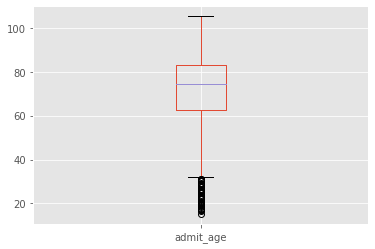

In [141]:
basic[basic['subject_id'].duplicated()==False]['admit_age'].plot(kind="box")

In [142]:
basic[basic['subject_id'].duplicated()==False]['hospital_expire_flg'].value_counts()


N    2299
Y    1625
Name: hospital_expire_flg, dtype: int64

In [143]:
basic['hospital_expire_flg'].value_counts()


N    3078
Y    1967
Name: hospital_expire_flg, dtype: int64

<AxesSubplot:xlabel='admit_age', ylabel='hospital_expire_flg'>

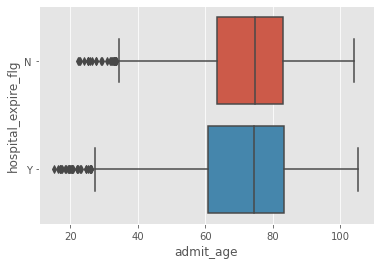

In [144]:
sns.boxplot(x="admit_age",y="hospital_expire_flg",data=basic[basic['subject_id'].duplicated()==False])


In [145]:
basic[(basic['subject_id'].duplicated()==False) & (basic['hospital_expire_flg']=='Y')]['admit_age'].describe()


count    1625.000000
mean       70.910503
std        16.395955
min        15.170743
25%        60.778798
50%        74.591538
75%        83.374744
max       105.343710
Name: admit_age, dtype: float64

In [146]:
basic[(basic['subject_id'].duplicated()==False) & (basic['hospital_expire_flg']=='N')]['admit_age'].describe()


count    2299.000000
mean       72.256175
std        14.110483
min        22.322156
25%        63.449626
50%        74.717482
75%        82.977748
max       104.160934
Name: admit_age, dtype: float64

<AxesSubplot:xlabel='admit_age', ylabel='hospital_expire_flg'>

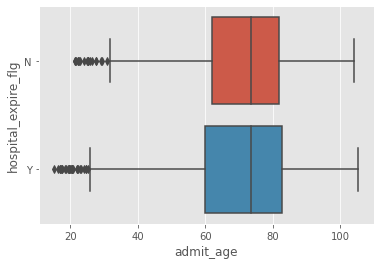

In [147]:
sns.boxplot(x="admit_age",y="hospital_expire_flg",data=basic)


In [148]:
basic[(basic['subject_id'].duplicated()==False) & (basic['hospital_expire_flg']=='N')]['admit_age'].mean()
#survived average age

72.25617527616212

In [149]:
basic[(basic['subject_id'].duplicated()==False) & (basic['hospital_expire_flg']=='Y')]['admit_age'].mean()
# died average age

70.91050255862669

In [108]:
26391.026098 - 25460.833636

930.1924619999991

## Conclusion:
Still No significant differnce between survived and died patients regarding age on admission
In numbers, the difference between average age of died and average age of survived is only 930 days (~ 2.5 years). More surprisingly the higher is the average age of survived NOT the died.